# Film dosimetry

For film dosimetry, tif image must contain the irradiated film(s) and an unirradiated one, separated by a minimum distance of 5 mm between them. The color image should have three channels: red, blue and green (RGB).

This is a common example for film calibration.

![example scanned films](../assets/example_scanned_film.png)

## Film calibration

Start importing two libraries.

In [1]:
from Dosepy.image import load
#from Dosepy.i_o import retrieve_demo_file
from pathlib import Path  

Read the tif file for film calibration and create a list with the imparted doses. For this example a demo file will be used.

In [2]:
# Change the line below to something like: path_to_file = "path/to/my/image.tif"
# path_to_file = retrieve_demo_file("cal_48h.tif")
path_to_file = "/home/luis/Documentos/calibration file.tif"
cal_image = load(path_to_file, for_calib = True)

imparted_doses = [0, 0.5, 1, 1.5, 2, 3, 5, 8, 10]

Produce the calibration curve using the red channel, a central roi with size 16 mm width, 8 mm height and a rational fit function: $y = -c + \frac{b}{x-a}$.

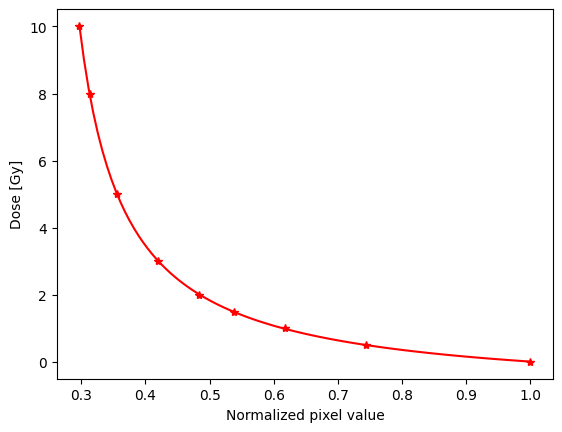

In [3]:
cal = cal_image.get_calibration(
    doses = imparted_doses,
    channel = "R", 
    roi = (16, 8),
    func = "RF"
    )
_ = cal.plot()

## Film to dose

Load another tif file

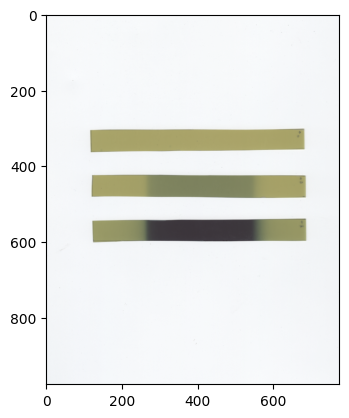

<Axes: >

In [4]:
#qa_image_path = retrieve_demo_file("verif.tif")
qa_image_path = "/home/luis/Documentos/test file.tif"
qa_image = load(qa_image_path)
qa_image.plot()

Apply the calibration curve

In [5]:
dose_img = qa_image.to_dose(cal)

Plot it

[]

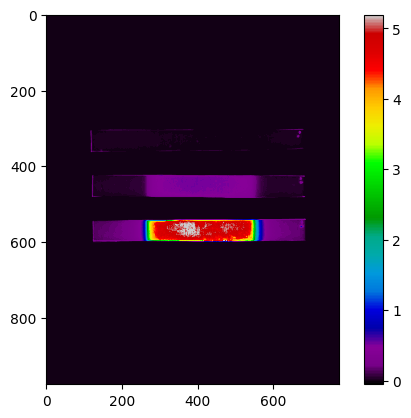

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(ncols=1)

max_dose = np.percentile(dose_img.array, [99.9])[0]
pos = ax.imshow(dose_img.array, cmap='nipy_spectral')
pos.set_clim(-.05, max_dose)

# add a colorbar
fig.colorbar(pos, ax=ax)
plt.plot()

Get mean doses from central rois, 20 mm width and 8 mm hight, in each founded films.

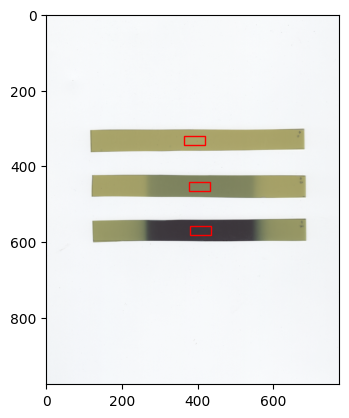

[0.00963348 0.51633034 5.00984937]


In [7]:
doses_in_central_rois = qa_image.doses_in_central_rois(cal, roi = (20, 8), show=True)
print(doses_in_central_rois)

Save the dose distribution as a tif file (in cGy) useful for further analysis using [ImageJ](https://imagej.net/ij/).

```python
dose_img.save_as_tif("dose_in_tif_file")
```

Save as csv file

```python
np.savetxt(file_name, dose_img.array, fmt = '%.3f', delimiter = ',')
```